In [4]:
import numpy as np
from matplotlib import pyplot as plt

PATH = 'data/cifar-100-python/'

In [2]:
# read dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train = unpickle(PATH+'train')
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [3]:
train_X_init = train[b'data']
train_Y1, train_Y2 = train[b'fine_labels'], train[b'coarse_labels']

In [4]:
# reconstruct img into 32(w)*32(h)*3(channel)
def reconstruct(img):
    r = img[:1024].reshape(32,32,1)
    g = img[1024:2048].reshape(32,32,1)
    b = img[2048:].reshape(32,32,1)
    img = np.concatenate((r,g,b),axis = 2) / 255
    return img

train_N = 50000
train_X_img = np.zeros([train_N,32,32,3], dtype=float)
for i in range(train_N):
    train_X_img[i] = reconstruct(train_X_init[i])

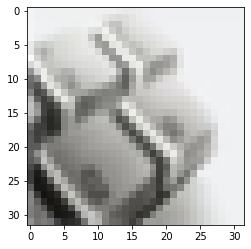

In [5]:
# test
plt.imshow(train_X_img[30000], interpolation='nearest')

In [15]:
# save reconstructed data
np.save('data/x_train.npy', train_X_img)
np.save('data/yf_train.npy', np.array(train_Y1))
np.save('data/yc_train.npy', np.array(train_Y2))

In [13]:
test = unpickle(PATH+'test')
test_X_init = test[b'data']
test_Y1, test_Y2 = test[b'fine_labels'], test[b'coarse_labels']

test_N = len(test_X_init)
test_X_img = np.zeros([test_N,32,32,3], dtype=float)
for i in range(test_N):
    test_X_img[i] = reconstruct(test_X_init[i])

In [16]:
np.save('data/x_test.npy', test_X_img)
np.save('data/yf_test.npy', np.array(test_Y1))
np.save('data/yc_test.npy', np.array(test_Y2))

In [5]:
# derive 2-class task with given categories i,j
# k indicating fine(0)/coarse(1) label
def make_task(i,j,k):
    labels = [np.load('data/yf_train.npy'), np.load('data/yc_train.npy')]
    x = np.load('data/x_train.npy')
    label = np.array(labels[k])
    label = np.where(label==i, -1, 0) + np.where(label==j, 1, 0)
    print(np.where(label!=0))
    x_tr, y_tr = x[np.where(label != 0)], label[np.where(label != 0)]
    return x_tr, np.array(y_tr>0, dtype=int)

# test of make
a,b = make_task(0,1,1)
print(np.array(b,dtype = int))

(array([    4,    50,    61, ..., 49968, 49971, 49999]),)
[1 1 0 ... 0 1 1]


In [6]:
pair = [[4, 22, 0], [1, 58, 0], [6, 21, 0], [9, 14, 0], [10, 17, 0], [98, 35, 0], [8, 16, 0], [7, 15, 0], 
                [3, 12, 0], [31, 96, 0], [13, 69, 0], [48, 53, 0], [77, 38, 0], [50, 72, 0], [28, 29, 0], 
                [49, 50, 0], [36, 37, 0], [61, 62, 0], [4, 44, 0], [4, 70, 0], [4, 24, 0]]
# 0 bear, chimpanzee  
# 1 apple, pear   
# 2 bed, chair  
# 3 bicycle, bus 
# 4 bottle, can    
# 5 wolf, fox
# 6 beetle, camel   
# 7 bee, butterfly  
# 8 baby, boy   
# 9 dolphin, whale
# 10 bridge, road
# 11 maple_tree, oak_tree
# 12 skyscraper, house
# 13 mountain, sea
# 14 crocodile, cup
# 15 motorcycle, mountain
# 16 girl, hamster
# 17 plain, plate
# 18 bear, lion
# 19 bear, rocket
# 20 bear, cloud

In [12]:
def make_t():
    # for i in range(len(pair)):
    set = pair[0]
    x, y = make_task(set[0]-1, set[1]-1, set[2])
    np.save("data_set_2/x"+str(0)+"_train.npy", x[:20])
    np.save("data_set_2/y"+str(0)+"_train.npy", y[:20])

make_t()

(array([   34,   172,   215,   235,   342,   354,   360,   383,   386,
         395,   412,   612,   679,   744,   772,   939,   943,  1070,
        1174,  1280,  1283,  1301,  1324,  1333,  1338,  1350,  1361,
        1421,  1558,  1637,  1650,  1653,  1672,  1702,  1794,  1902,
        1925,  1955,  1961,  1967,  1995,  2031,  2085,  2128,  2193,
        2225,  2227,  2241,  2335,  2369,  2380,  2406,  2412,  2421,
        2459,  2495,  2549,  2555,  2695,  2698,  2710,  2738,  2773,
        2777,  2898,  3043,  3074,  3082,  3083,  3124,  3145,  3193,
        3277,  3519,  3585,  3604,  3643,  3661,  3678,  3692,  3722,
        3729,  3737,  3835,  3887,  3900,  3966,  3983,  4049,  4096,
        4280,  4353,  4364,  4372,  4410,  4455,  4456,  4514,  4534,
        4585,  4610,  4765,  4810,  4825,  5029,  5105,  5173,  5263,
        5286,  5292,  5321,  5360,  5381,  5596,  5646,  5687,  5713,
        5849,  5943,  5945,  5964,  5973,  5974,  6046,  6056,  6133,
        6136,  6187

In [9]:
def make():
    for i in range(len(pair)):
        set = pair[i]
        x, y = make_task(set[0]-1, set[1]-1, set[2])
        np.save("data_set_2/x"+str(i)+"_train.npy", x)
        np.save("data_set_2/y"+str(i)+"_train.npy", y)

make()

(array([   34,   172,   215,   235,   342,   354,   360,   383,   386,
         395,   412,   612,   679,   744,   772,   939,   943,  1070,
        1174,  1280,  1283,  1301,  1324,  1333,  1338,  1350,  1361,
        1421,  1558,  1637,  1650,  1653,  1672,  1702,  1794,  1902,
        1925,  1955,  1961,  1967,  1995,  2031,  2085,  2128,  2193,
        2225,  2227,  2241,  2335,  2369,  2380,  2406,  2412,  2421,
        2459,  2495,  2549,  2555,  2695,  2698,  2710,  2738,  2773,
        2777,  2898,  3043,  3074,  3082,  3083,  3124,  3145,  3193,
        3277,  3519,  3585,  3604,  3643,  3661,  3678,  3692,  3722,
        3729,  3737,  3835,  3887,  3900,  3966,  3983,  4049,  4096,
        4280,  4353,  4364,  4372,  4410,  4455,  4456,  4514,  4534,
        4585,  4610,  4765,  4810,  4825,  5029,  5105,  5173,  5263,
        5286,  5292,  5321,  5360,  5381,  5596,  5646,  5687,  5713,
        5849,  5943,  5945,  5964,  5973,  5974,  6046,  6056,  6133,
        6136,  6187

In [17]:
# derive 2-class task with given categories i,j
# k indicating fine(0)/coarse(1) label
def make_task(i,j,k):
    labels = [np.load('data/yf_test.npy'), np.load('data/yc_test.npy')]
    x = np.load('data/x_test.npy')
    label = np.array(labels[k])
    label = np.where(label==i, -1, 0) + np.where(label==j, 1, 0)
    print(np.where(label!=0))
    x_tr, y_tr = x[np.where(label != 0)], label[np.where(label != 0)]
    return x_tr, np.array(y_tr>0, dtype=int)

In [18]:

def make():
    for i in range(len(pair)):
        set = pair[i]
        x, y = make_task(set[0]-1, set[1]-1, set[2])
        np.save("data_set_2/x"+str(i)+"_test.npy", x)
        np.save("data_set_2/y"+str(i)+"_test.npy", y)

make()

(array([  24,   93,   95,  126,  243,  383,  396,  413,  493,  596,  633,
        687,  716,  729,  737,  849,  916,  919,  965,  989, 1028, 1030,
       1055, 1120, 1176, 1197, 1199, 1300, 1302, 1476, 1496, 1531, 1576,
       1585, 1619, 1621, 1624, 1672, 1715, 1732, 1746, 1754, 1834, 1853,
       1893, 1897, 1923, 1957, 2021, 2027, 2041, 2092, 2107, 2130, 2188,
       2264, 2278, 2287, 2417, 2464, 2587, 2657, 2702, 2793, 2809, 2858,
       2864, 2888, 2897, 2900, 2919, 3016, 3023, 3025, 3033, 3045, 3121,
       3169, 3178, 3222, 3255, 3345, 3404, 3442, 3456, 3473, 3514, 3528,
       3653, 3688, 3809, 3819, 3846, 3875, 3998, 4094, 4107, 4164, 4181,
       4187, 4218, 4305, 4349, 4473, 4491, 4512, 4585, 4627, 4635, 4696,
       4745, 4911, 5076, 5086, 5090, 5120, 5132, 5165, 5167, 5252, 5261,
       5274, 5322, 5385, 5466, 5574, 5663, 5673, 5719, 6027, 6052, 6140,
       6310, 6353, 6387, 6539, 6639, 6649, 6675, 6718, 6798, 6880, 6932,
       6946, 6985, 7079, 7092, 7243, 7325, 7400, 7

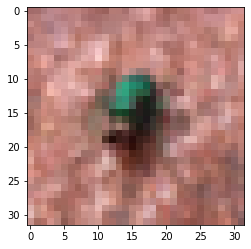

In [19]:
# test
plt.imshow(np.load("data_set_2/x6_test.npy")[100])